# WSI - ćwiczenie 1
## Yaroslav Harbar
### Zagadnienie przeszukiwania i podstawowe podejścia do niego

In [216]:
import numpy as np
import matplotlib.pyplot as plt

In [217]:
def g(arg):
    x1, x2 = arg
    return 2.0 - np.exp(-(x1**2) -(x2**2)) - 0.5*np.exp(-(x1+1.5)**2 - (x2 - 2.0)**2)

In [218]:
def f(arg):
    x = arg[0]
    return 1/4*x**4

In [219]:
def gradient_g(arg):
    x1, x2 = arg

    return [
        2*x1*np.exp(-(x1**2) -(x2**2))+(x1+1.5)*np.exp(-(x1+1.5)**2-(x2-2)**2),
        2*x2*np.exp(-(x1**2) -(x2**2))+(x2-2)*np.exp(-(x1+1.5)**2-(x2-2)**2)
    ]

In [220]:
def gradient_f(arg):
    x = arg[0]
    return x**3

In [221]:
class Solver:
    """
    Klasa, która przyjmuję jako argumenty wartość kroku i ilość iteracji i daje możliwość znalezienia minimum lokalnego
    """
    def __init__(self, step, iterations):
        self.step = step
        self.iterations = iterations

    def get_parameters(self):
        """
        :return: Zwraca takie parametry klasy 'Solver' jak krok i ilość iteracji
        """
        return {
            "step": self.step,
            "iterations": self.iterations
        }

    def gradient_descent_solver(self, function, gradient, start_values):
        """
        :param function: funkcja minimum lokalne, której chcemy zanleźć
        :param gradient: gradient :param function
        :param start_values: wartości początkowe
        :return:
        """
        ans = np.array(start_values)

        history_item = ans
        history_item = np.append(history_item, function(ans))
        history = [history_item]

        for _ in range(self.iterations):
            difference = self.step*np.array(gradient(ans))
            ans -= difference

            history_item = ans
            history_item = np.append(history_item, function(ans))
            history.append(history_item)

        return ans, history

In [222]:
class Plot2D:
    """
    Klasa, która pomaga w tworzeniu wykresów na przestrzeni 2D
    """
    def __init__(self, title="2D"):
        self.fig, self.ax = plt.subplots(figsize=(8,6))
        plt.style.use('bmh')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.set_title(title)

    def get_fig(self):
        return self.fig

    def get_ax(self):
        return self.ax

    def add_2d_function(self, function, x_values):
        y_values = []

        for x in x_values:
            y_values.append(function([x]))
        self.ax.plot(x_values, y_values)

    def add_scatter(self, values, color):
        x_values, y_values = map(list, zip(*values))
        if len(x_values) == len(y_values):
            self.ax.scatter(x_values, y_values, color=color)

In [223]:
class Plot3D:
    """
    Klasa, która pomaga w tworzeniu wykresów na przestrzeni 3D
    """
    def __init__(self, title="3D"):
        self.fig = plt.figure(figsize=(12,8))
        self.ax = plt.axes(projection='3d')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.set_zlabel('z')
        self.ax.set_title(title)
        self.ax.view_init(30, 90)

    def get_fig(self):
        return self.fig

    def get_ax(self):
        return self.ax

    def add_3d_function(self, function, x_values, y_values):
        x, y = np.meshgrid(x_values, y_values)
        z = function([x, y])
        self.ax.plot_surface(x, y, z, cmap="plasma")

    def add_scatter(self, values, color="red"):
        x_values, y_values, z_values = map(list, zip(*values))
        if len(x_values) == len(y_values) and len(x_values) == len(z_values):
            self.ax.scatter(x_values, y_values, z_values, color=color)

In [224]:
class Contour:
    def __init__(self, title="Contour"):
        self.fig, self.ax = plt.subplots(1, 1, figsize=(8,6))
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.set_title(title)

    def add_contour(self, function, x_values, y_values):
        x, y = np.meshgrid(x_values, y_values)
        z = function([x, y])
        cp = self.ax.contour(x, y, z)
        self.fig.colorbar(cp)

    def add_scatter(self, values, color="red"):
        x_values, y_values, z_values = map(list, zip(*values))
        if len(x_values) == len(y_values) and len(x_values) == len(z_values):
            self.ax.scatter(x_values, y_values, z_values, color=color)

## Minimum funkcji f
Sprawdzam działanie algorytmu gradientu prostego dla funkcji **f** i *stałego* punktu początkowego dla różnych wartości kroku i iteracji

In [225]:
class Solver2DImpl:
    def __init__(self, function, gradient, x_values):
        self.function = function
        self.gradient = gradient
        self.x_values = x_values

    def solve(self, solver_step, solver_iteration, start_point):
        s = Solver(solver_step, solver_iteration)
        ans, history = s.gradient_descent_solver(self.function, self.gradient, start_point)

        p2d = Plot2D()
        p2d.add_2d_function(self.function, self.x_values)
        p2d.add_scatter(history, 'red')

        print(f"Minimum lokalne funkcji {self.function.__name__} wynosi {self.function([ans[0]])}, gdzie x = {ans[0]}: ")
solver = Solver2DImpl(f, gradient_f, np.arange(-5.0, 5.0, 0.1))

Zwiększam liczbę iteracji i spodziewam się, że dokładność minimum będzie coraz lepsza

Minimum lokalne funkcji f wynosi 0.000259040345392005, gdzie x = 0.17941421549565084: 


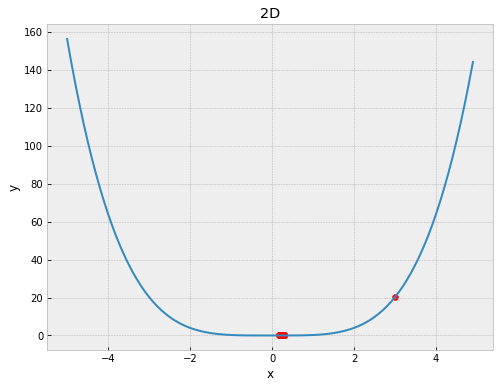

In [226]:
solver.solve(0.1, 100, [3.0])

Minimum lokalne funkcji f wynosi 0.000259040345392005, gdzie x = 0.17941421549565084: 


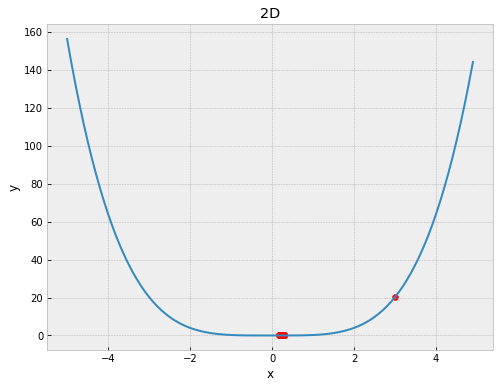

In [227]:
solver.solve(0.1, 100, [3.0])

Minimum lokalne funkcji f wynosi 5.596531576411593e-06, gdzie x = 0.06878515772306604: 


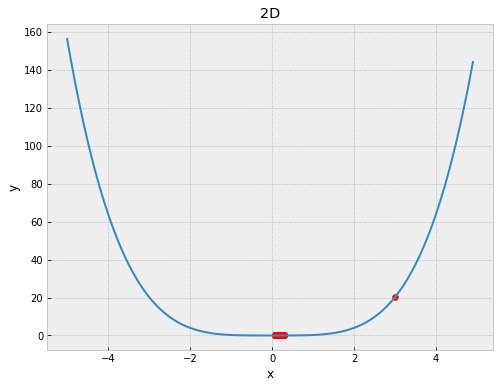

In [228]:
solver.solve(0.1, 1000, [3.0])

Jak widać po zwiększeniu ilości iteracji, dokładność wartości znalezionego minimum staje się coraz lepsza, ponieważ idealna odpowiedź jest 0.

Następnie testuję jak wpływa zmniejszenie wartość kroku na wynik danego solvera. Oczekuję, że dokładność minimum będzie coraz lepsza.

Minimum lokalne funkcji f wynosi 1.5024202474730822e-06, gdzie x = 0.049512271914084846: 


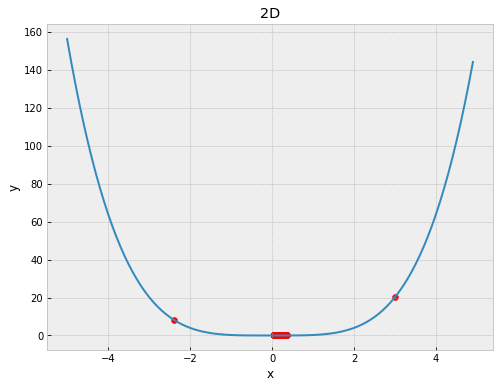

In [229]:
solver.solve(0.2, 1000, [3.0])

Minimum lokalne funkcji f wynosi 5.596531576411593e-06, gdzie x = 0.06878515772306604: 


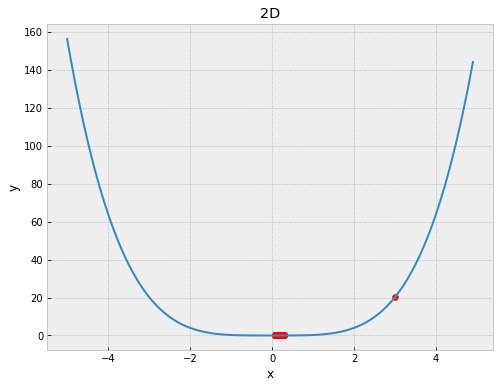

In [230]:
solver.solve(0.1, 1000, [3.0])

Minimum lokalne funkcji f wynosi 0.0006132682852488673, gdzie x = 0.22255001317984383: 


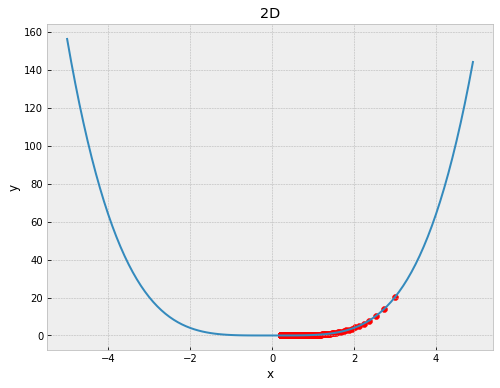

In [231]:
solver.solve(0.01, 1000, [3.0])

Minimum lokalne funkcji f wynosi 0.05585947323969922, gdzie x = 0.687526127278277: 


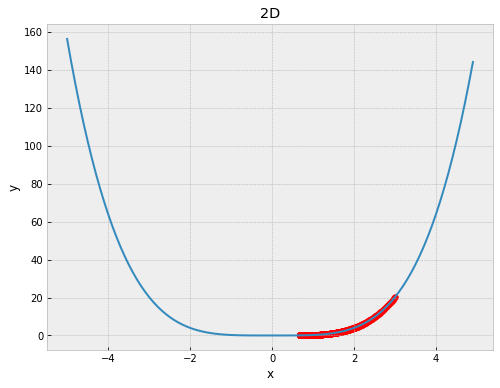

In [232]:
solver.solve(0.001, 1000, [3.0])

Analizując powyższe wykresy, można wywnioskować, że krok wpływa na dokładność wyniku. Zwiększając krok zwiększa się też prawdopodobieństwo tego, że przy pewnej iteracji algorytm przeskoczy minimum i będą widoczne drgania. W zależności od kroku te drgania mogą być gasnące lub niegasnące (co może spowodować błąd solvera). Przy zmniejszeniu wartości kroku, może wystąpić też taka sytuacja, że krok będzie na tyle mały, że solver nie da rady znaleźć minimum przy danej ilości iteracji.

## Badanie wpływu zmiany kroku i punktu początkowego na działanie algorytmu

Punkt początkowy jest blisko minimum:

Minimum lokalne funkcji f wynosi 6.138384992754359e-06, gdzie x = 0.07039284672891276: 


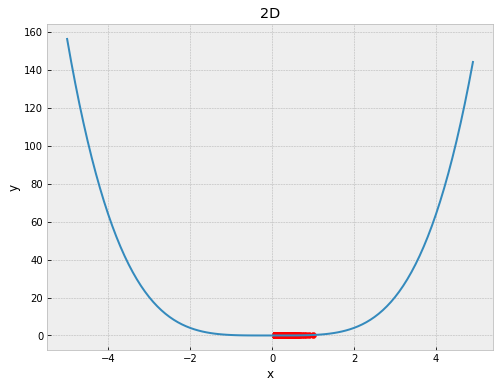

In [233]:
solver.solve(0.1, 1000, [1.0])

Punkt początkowy jest daleko minimum x0 = 4:

Minimum lokalne funkcji f wynosi 6.164554036861275e-06, gdzie x = -0.07046775144089548: 


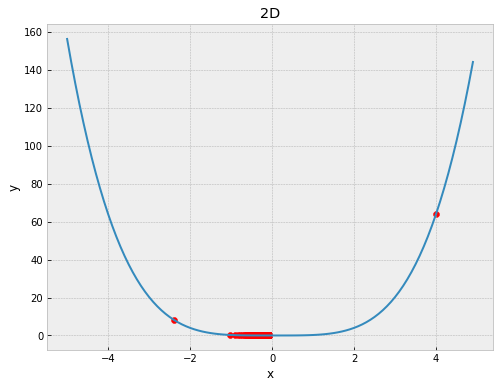

In [234]:
solver.solve(0.1, 1000, [4.0])

Dla punktów powyżej 5 występuję błąd, który świadczy o tym, że doszło do rozbieżności algorytmu, jednakże po zmniejszeniu wartość kroku algorytm pozostaje zbieżny.

<ipython-input-218-38bd9724149a>:3: RuntimeWarning: overflow encountered in double_scalars
  return 1/4*x**4
<ipython-input-221-47ba7639e055>:33: RuntimeWarning: invalid value encountered in subtract
  ans -= difference


Minimum lokalne funkcji f wynosi nan, gdzie x = nan: 


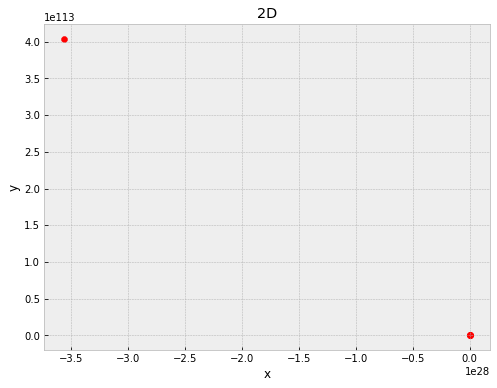

In [235]:
solver.solve(0.1, 1000, [5.0])

Minimum lokalne funkcji f wynosi 0.0006164697351203517, gdzie x = 0.22283989127761095: 


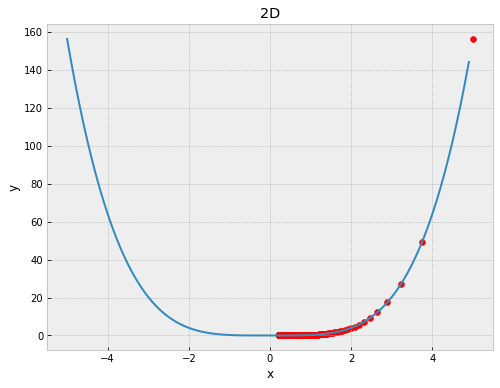

In [236]:
solver.solve(0.01, 1000, [5.0])

<ipython-input-218-38bd9724149a>:3: RuntimeWarning: overflow encountered in double_scalars
  return 1/4*x**4
<ipython-input-221-47ba7639e055>:33: RuntimeWarning: invalid value encountered in subtract
  ans -= difference


Minimum lokalne funkcji f wynosi nan, gdzie x = nan: 


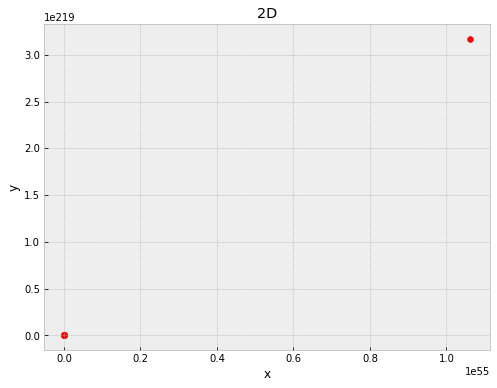

In [237]:
solver.solve(0.01, 1000, [15.0])

Dla punktu początkowego 15,0 już krok 0,01 jest za duży, w związku z czym jeszcze raz zmniejszam jego wartość.

Minimum lokalne funkcji f wynosi 0.06163355532358399, gdzie x = 0.7046432612922529: 


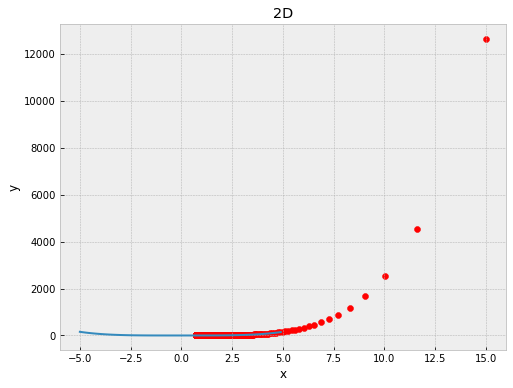

In [238]:
solver.solve(0.001, 1000, [15.0])

Jak widać, jeżeli punkt początkowy jest dość daleko minimum to krok musimy zmniejszyć, aby uniknąć rozbieżności algorytmu.

Dla punktu początkowego < 0 sytuacja wygląda analogicznie:

Minimum lokalne funkcji f wynosi 0.0001549924486694067, gdzie x = -0.15779478017704127: 


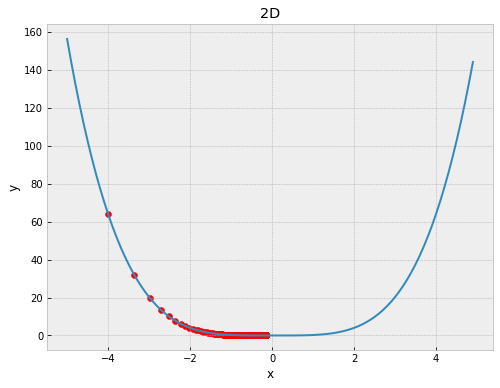

In [239]:
solver.solve(0.01, 2000, [-4.0])

Minimum lokalne funkcji f wynosi 0.06163355532358399, gdzie x = -0.7046432612922529: 


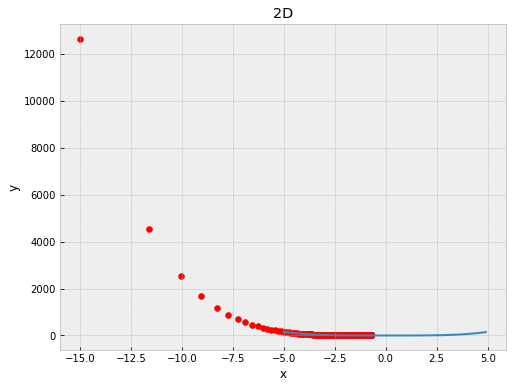

In [240]:
solver.solve(0.001, 1000, [-15.0])

# Minimum funkcji g
### Sprawdzenie działanie algorytmu gradientu prostego dla funkcji **g** i *stałego* punktu początkowego dla różnych wartości kroku i iteracji

In [241]:
class Solver3DImpl:
    def __init__(self, function, gradient, x_values, y_values):
        self.function = function
        self.gradient = gradient
        self.x_values = x_values
        self.y_value = y_values

    def solve(self, solver_step, solver_iteration, start_point):
        s = Solver(solver_step, solver_iteration)
        ans, history = s.gradient_descent_solver(self.function, self.gradient, start_point)

        p3d = Plot3D()
        p3d.add_scatter(history, 'red')
        p3d.add_3d_function(self.function, self.x_values, self.y_value)

        p3d_contour = Contour()
        p3d_contour.add_contour(self.function, self.x_values, self.y_value)
        p3d_contour.add_scatter(history)

        print(f"Minimum lokalne funkcji {self.function.__name__} wynosi {self.function(ans)}, gdzie x1 = {ans[0]}, x2 = {ans[1]}")

solver = Solver3DImpl(g, gradient_g, np.arange(-5.0, 5.0, 0.1), np.arange(-5.0, 5.0, 0.1))

## Sprawdzam działanie algorytmu dla stałej wartości iteracji i zmieniam wartość kroku
Zmniejszam wielkość kroku i spodziewam się, że wyznaczone minimum będzie bliższe temu, którego się spodziewamy analizując wykresy.

Minimum lokalne funkcji g wynosi 1.197261101763884, gdzie x1 = -0.3772908846558861, x2 = -0.2799177800050173


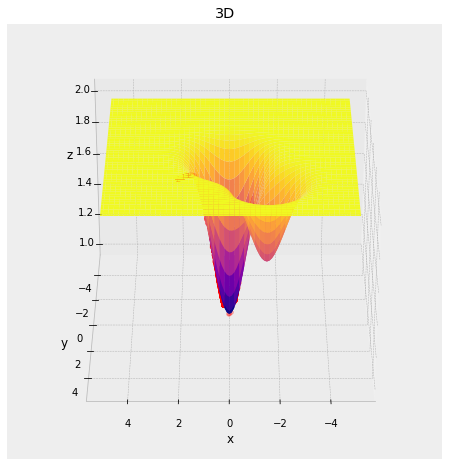

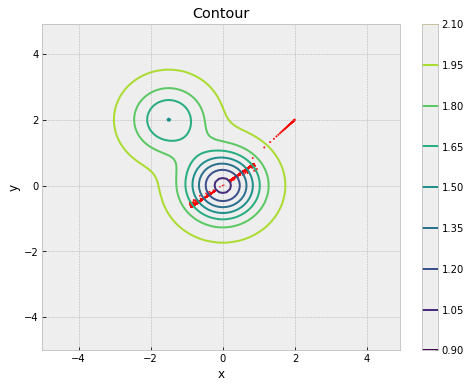

In [242]:
solver.solve(2, 3000, [2.0, 2.0])

Minimum lokalne funkcji g wynosi 0.9990288844357263, gdzie x1 = -0.0014641840737104415, x2 = 0.0019522454316139228


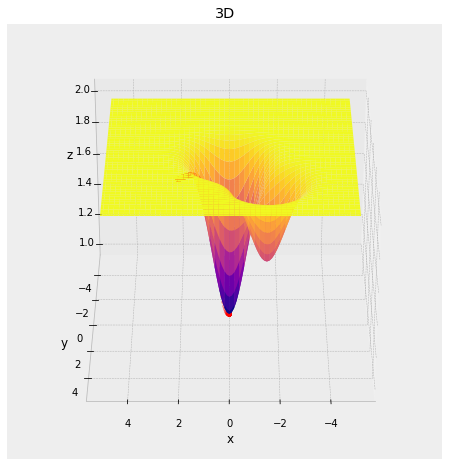

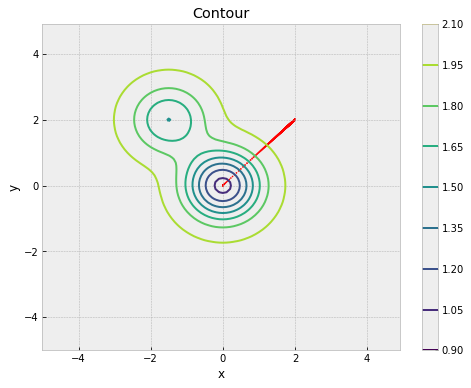

In [243]:
solver.solve(0.1, 3000, [2.0, 2.0])

Minimum lokalne funkcji g wynosi 1.9995057094309991, gdzie x1 = 1.9515243378127196, x2 = 1.9521084014186938


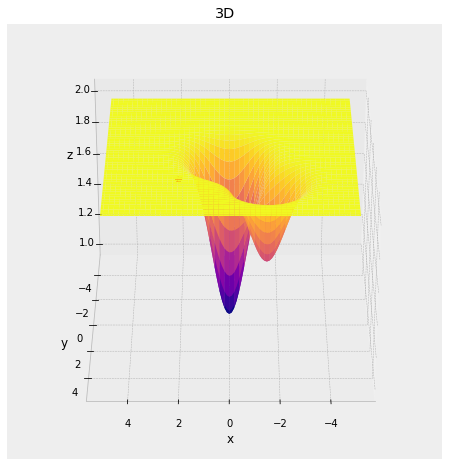

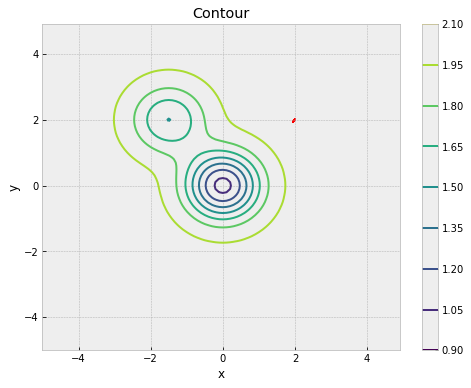

In [244]:
solver.solve(0.01, 3000, [2.0, 2.0])

Jak widać przy zmniejszeniu wielkości kroku, algorytm działa coraz lepiej, ale następuje też taka sytuacja, w przypadku której krok ten jest na tyle mały, że solver nie da rady znaleźć odpowiedniego minimum przy danej ilości iteracji. Natomiast przy zwiększeniu wartości kroku w algorytmie zaczynają występować oscylacje wokół minimum.

## Sprawdzam działanie algorytmu dla stałej wartości kroku i zwiększam wartość ilości iteracji
Spodziewam się, że wyznaczone minimum będzie bliższe temu, którego się spodziewamy, analizując wykresy.

Minimum lokalne funkcji g wynosi 1.999658463089434, gdzie x1 = 1.9986351853496285, x2 = 1.9986520001889392


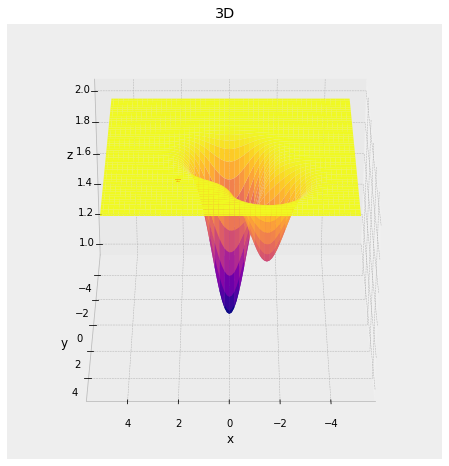

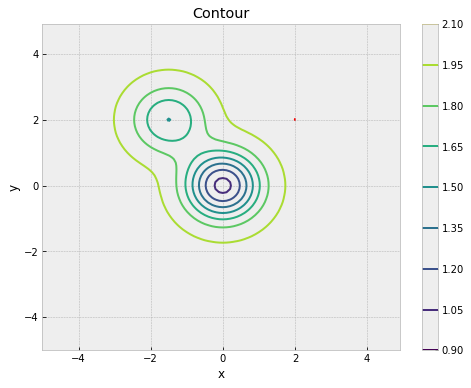

In [245]:
solver.solve(0.1, 10, [2.0, 2.0])

Minimum lokalne funkcji g wynosi 1.9996216127787467, gdzie x1 = 1.9856872198186593, x2 = 1.9858624867344163


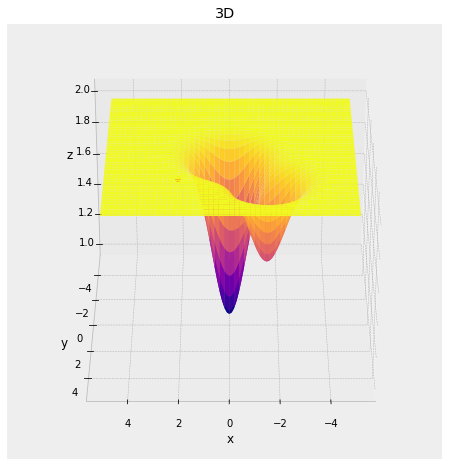

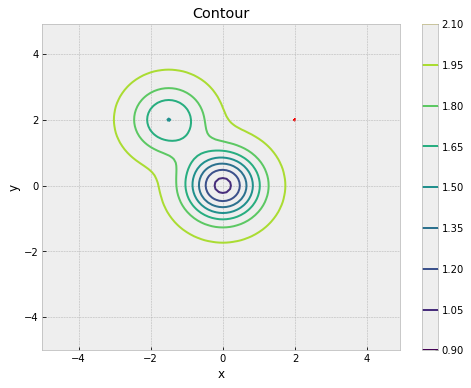

In [246]:
solver.solve(0.1, 100, [2.0, 2.0])

Minimum lokalne funkcji g wynosi 1.9928843284085027, gdzie x1 = 1.5711001975295829, x2 = 1.575377244443362


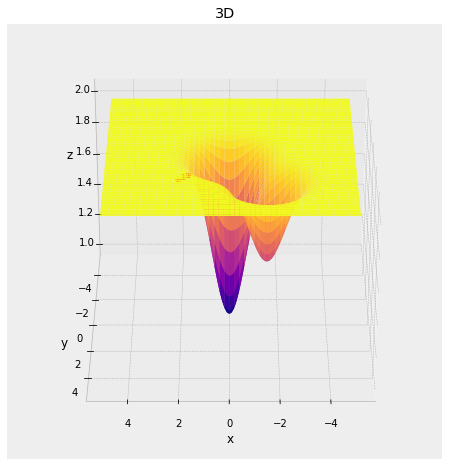

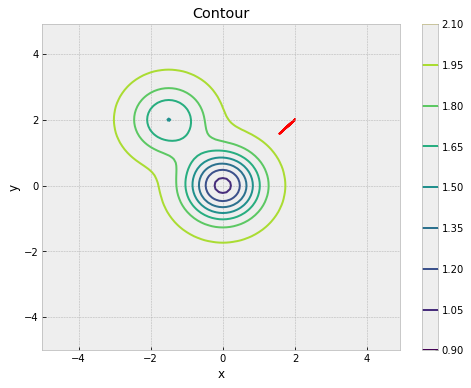

In [247]:
solver.solve(0.1, 1000, [2.0, 2.0])

Minimum lokalne funkcji g wynosi 0.9990288844357263, gdzie x1 = -0.0014641840737104415, x2 = 0.0019522454316139228


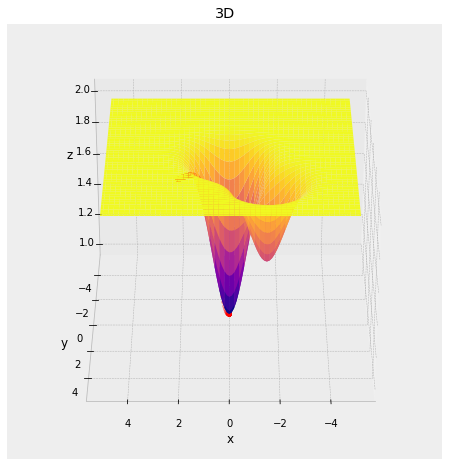

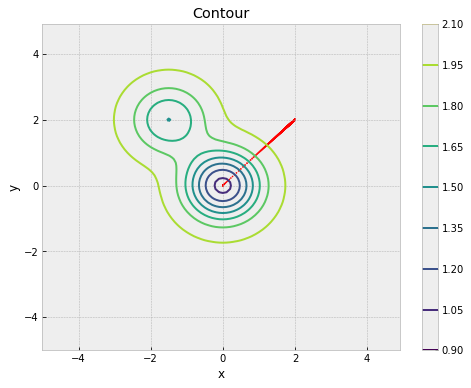

In [248]:
solver.solve(0.1, 10000, [2.0, 2.0])

Analizując powyższe wyniki, można wywnioskować, że po zwiększeniu ilości iteracji wynik algorytmu jest coraz lepszy. Widać to dobrze na wykresie konturowym gdzie czerwone punkty zbiegają do punktu (0,0), który jest minimum lokalnym funkcji g

## Badanie wpływu zmiany kroku i punktu początkowego na działanie algorytmu

Minimum lokalne funkcji g wynosi 1.498020763842511, gdzie x1 = -1.4939329441111509, x2 = 1.9919105921482008


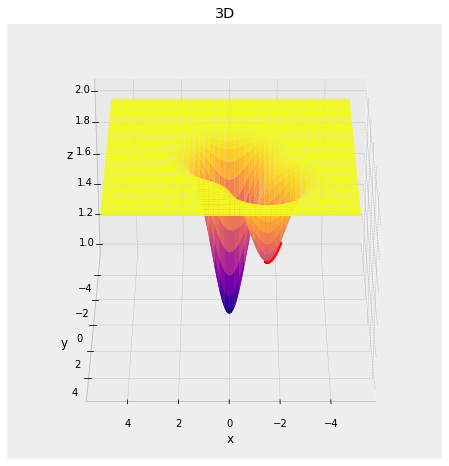

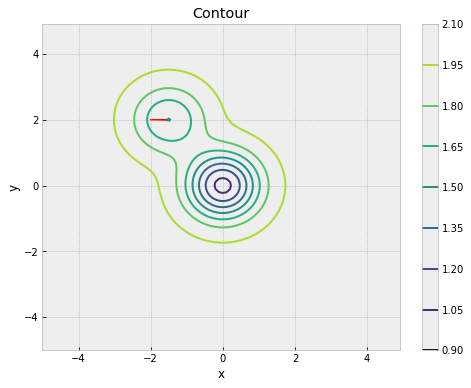

In [249]:
solver.solve(0.1, 3000, [-2.0, 2.0])

Minimum lokalne funkcji g wynosi 0.9990288844357263, gdzie x1 = -0.0014641840737104424, x2 = 0.0019522454316139228


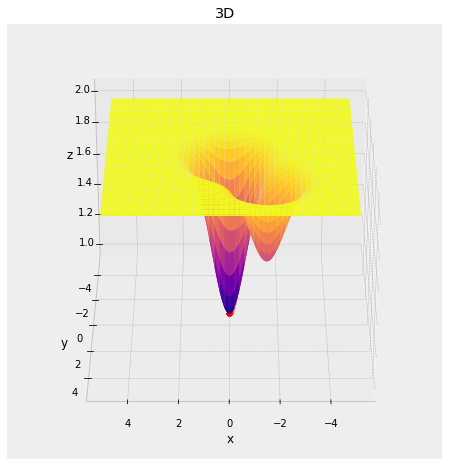

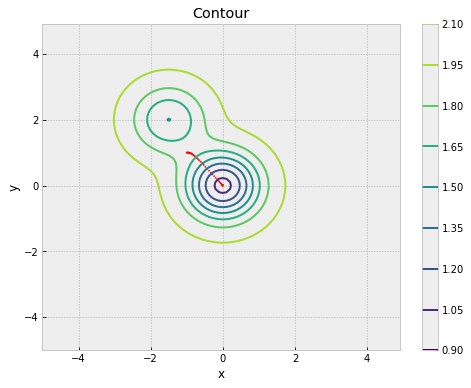

In [250]:
solver.solve(0.1, 3000, [-1.0, 1.0])

Jak widać z wykresu, funkcja g ma dwa minima, jedno w punkcie (0,0), drugie w punkcie (-1.5, 2). W zależności od punktu początkowego algorytm daje inny wynik. Algorytm z każdą iteracją zbiega do bliższego minimum danej funkcji. Jednakże nie zawsze odpowiedź będzie zależeć od bliższej odległości względem minimum. Zdarzają się też sytuacje, kiedy krok jest na tyle duży, że w trakcie iteracji algorytm po prostu przeskoczy przez bliższe minimum.

Minimum lokalne funkcji g wynosi 0.9990288844357263, gdzie x1 = -0.0014641840737104415, x2 = 0.001952245431613922


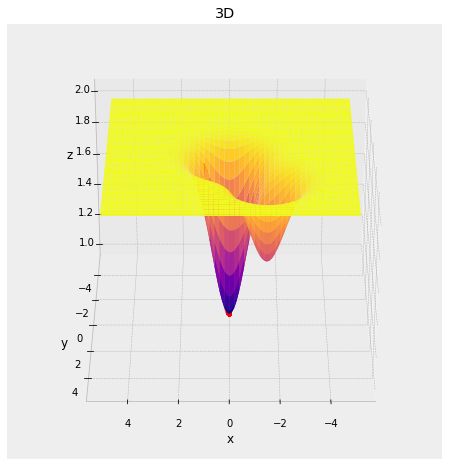

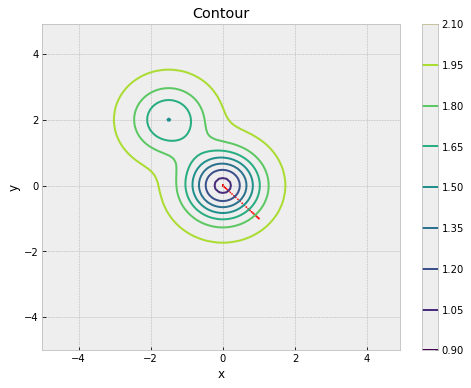

In [251]:
solver.solve(0.1, 3000, [1.0, -1.0])

Minimum lokalne funkcji g wynosi 1.5336058068126697, gdzie x1 = -1.277005200305594, x2 = 2.154606400002366


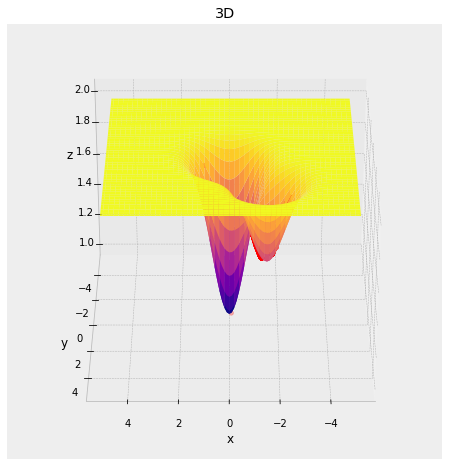

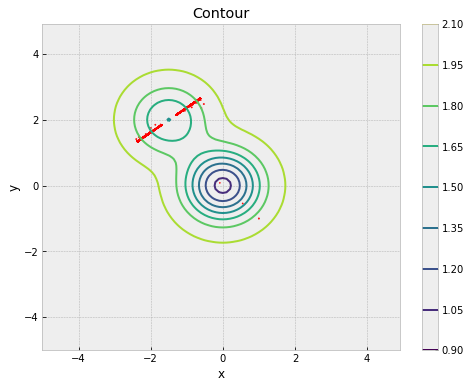

In [252]:
solver.solve(4, 3000, [1.0, -1.0])

Jak widać na wykresie powyżej, że punkt początkowy (1, -1) jest bliżej minimum w punkcie (0, 0), jednakże algorytm zbiega do minimum w punkcie (-1.5, 2), ponieważ krok jest na tyle duży, że punkt (0,0) zostaje przeskoczony.

# Wnioski

Po przeprowadzaniu symulacji dla dwóch typów funkcji (z jednym parametrem i z dwoma parametrami), można wywnioskować, że na odpowiedź danego algorytmu wpływa badana funkcja, wartość kroku, liczba iteracji algorytmu oraz punkt początkowy.

Punkt początkowy decyduje w głównej mierze o tym, czy algorytm zbiega do minimum globalnego, czy do minimum lokalnego. Krok i ilość iteracji wpływają na szybkość zbiegania algorytmu, a także na dokładność wyniku końcowego. Przy zbyt małej ilości iteracji i odpowiedniej wielkości kroku algorytm nie osiągnie minimum, natomiast przy zbyt dużej ilości iteracji minimum zostanie osiągnięte, jednakże czas działania algorytmu będzie bardzo długi. Jeśli krok będzie zbyt mały, algorytm nie będzie w stanie osiągną minimum przy podanej ilości iteracji, a w przypadku zbyt dużej wartości kroku algorytm nie będzie zbieżny.

Można z tego wywnioskować, że aby znaleźć optymalne wartości niezbędnych parametrów, musimy zrobić kilka symulacji, opierając się o powyższe rozmyślenia, dzięki czemu będziemy pewni, że nasz algorytm osiągnie satysfakcjonujący rezultat.